In [4]:
import time
import random
import matplotlib.pyplot as plt
import heapq

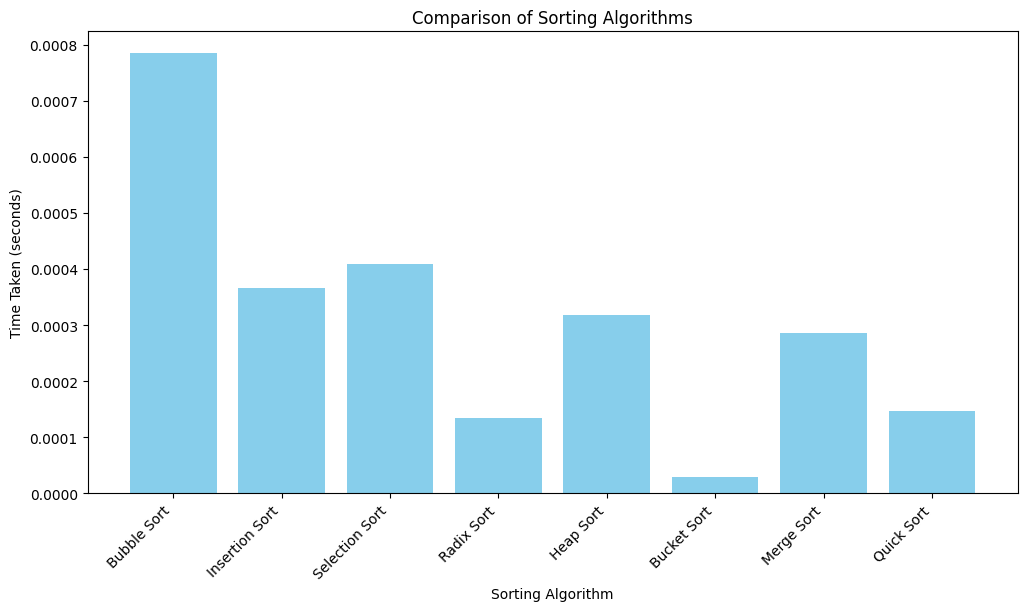

In [7]:
#1.Comparing sorting algorithms:
# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Selection Sort
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

# Radix Sort
def radix_sort(arr):
    RADIX = 10
    maxLength = False
    tmp, placement = -1, 1

    while not maxLength:
        maxLength = True
        buckets = [list() for _ in range(RADIX)]

        for i in arr:
            tmp = i // placement
            buckets[tmp % RADIX].append(i)
            if maxLength and tmp > 0:
                maxLength = False

        a = 0
        for b in range(RADIX):
            buck = buckets[b]
            for i in buck:
                arr[a] = i
                a += 1

        placement *= RADIX

# Heap Sort
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Bucket Sort
def bucket_sort(arr):
    buckets = [[] for _ in range(10)]
    for num in arr:
        idx = num // 1000
        buckets[idx].append(num)
    for i in range(10):
        buckets[i].sort()
    arr.clear()
    for bucket in buckets:
        arr.extend(bucket)

# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# Quick Sort
def part(arr, low, high):
    i = (low - 1)
    pivot = arr[high]

    for j in range(low, high):
        if arr[j] <= pivot:
            i = i + 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return (i + 1)

def quick_sort(arr, low, high):
    if low < high:
        pi = part(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

# Main function to compare sorting algorithms
def compare_sortalgos(A, n):
    sort_algo = {
        "Bubble Sort": bubble_sort,
        "Insertion Sort": insertion_sort,
        "Selection Sort": selection_sort,
        "Radix Sort": radix_sort,
        "Heap Sort": heap_sort,
        "Bucket Sort": bucket_sort,
        "Merge Sort": merge_sort,
        "Quick Sort": quick_sort
    }

    time_taken = {}

    for algoname, algo in sort_algo.items():
        arr = A.copy()
        start_time = time.time()
        if algoname == "Quick Sort":
            algo(arr, 0, n - 1)  # Pass initial values for low and high
        else:
            algo(arr)
        end_time = time.time()
        time_taken[algoname] = end_time - start_time

    return time_taken


# Plot the time taken by each sorting algorithm
def plot_time_taken(time_taken):
    plt.figure(figsize=(12, 6))
    plt.bar(time_taken.keys(), time_taken.values(), color='skyblue')
    plt.xlabel('Sorting Algorithm')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Comparison of Sorting Algorithms')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Number of random integers
n = 100
arr=[random.randint(1, 10000) for _ in range(n)]

# Compare sorting algorithms
time_taken = compare_sortalgos(arr,n)

# Plot the time taken by each sorting algorithm
plot_time_taken(time_taken)

In [15]:
def merge_sorted_lists(lists):
    merged_list = []
    pointer = [0] * len(lists)  # Pointers to keep track of the current index

    while True:
        min_val = float('inf')
        min_idx = None

        # minimum value in all lists
        for i, lst in enumerate(lists):
            if pointer[i] < len(lst) and lst[pointer[i]] < min_val:
                min_val = lst[pointer[i]]
                min_idx = i

        # If minimum value is infinity, then all lists have been traversed
        if min_val == float('inf'):
            break

        # Append the minimum value to the merged list and move pointer to the next element in the respective list
        merged_list.append(min_val)
        pointer[min_idx] += 1

    return merged_list

# Input from user
m = int(input("Enter the number of sorted lists: "))
n = int(input("Enter the number of elements in each list: "))

# Taking input for sorted lists from user
sorted_lists = []
for i in range(m):
    lst = list(map(int, input(f"Enter the elements of list {i+1} separated by space: ").split()))
    sorted_lists.append(lst)

# Merge the sorted lists
merged_result = merge_sorted_lists(sorted_lists)
print("Merged sorted list:", merged_result)


Enter the number of sorted lists: 3
Enter the number of elements in each list: 4
Enter the elements of list 1 separated by space: 1 3 3 5
Enter the elements of list 2 separated by space: 3 4 5 6
Enter the elements of list 3 separated by space: 0 0 1 1
Merged sorted list: [0, 0, 1, 1, 1, 3, 3, 3, 4, 5, 5, 6]


In [19]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def build_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

def extract_max(arr):
    if not arr:
        return None
    root = arr[0]
    arr[0] = arr[-1]
    arr.pop()
    heapify(arr, len(arr), 0)
    return root

def k_largest_elements(arr, k):
    build_heap(arr)
    result = []
    for _ in range(k):
        max_element = extract_max(arr)
        if max_element is not None:
            result.append(max_element)
        else:
            break
    return result

# Example usage
arr = [3, 10, 4, 7, 6, 9, 1]
k = int(input("Enter value of k: "))
if(k>len(arr)):
  print("Enter the valid value of k. k<n")
else:
  print(k_largest_elements(arr, k))


Enter value of k: 2
[10, 9]


In [37]:
#4.maximum number of activities performed by a single person
#first sort by end time for more activities
def sort_endTime(a):
    a.sort(key=lambda x: x[1])

def max_activities(A):
    sort_endTime(A)
    count = 1
    end_time = A[0][1]
    sel_A = [A[0]]
    for i in range(1, len(A)):
        if A[i][0] >= end_time:
            count += 1
            end_time = A[i][1]
            sel_A.append(A[i])
    return count, sel_A

# Example usage
activity = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11),(4, 5)]
count, select_activity = max_activities(activity)
print("Maximum number of activities:", count)
print("Order for Activities:")
print(select_activity)


Maximum number of activities: 4
Order for Activities:
[(1, 4), (4, 5), (5, 7), (8, 11)]


In [38]:
#5.Given a set of intervals, print all non-overlapping intervals after merging the overlapping intervals
def merge_intervals(inter):
    merged = []
    inter.sort(key=lambda x: x[0])
    for i in inter:
        if not merged or merged[-1][1] < i[0]:
            merged.append(i)
        else:
            merged[-1][1] = max(merged[-1][1], i[1])
    return merged

intervals = [[1,3],[2,7],[8,10],[15,18]]
print(merge_intervals(intervals))


[[1, 7], [8, 10], [15, 18]]
